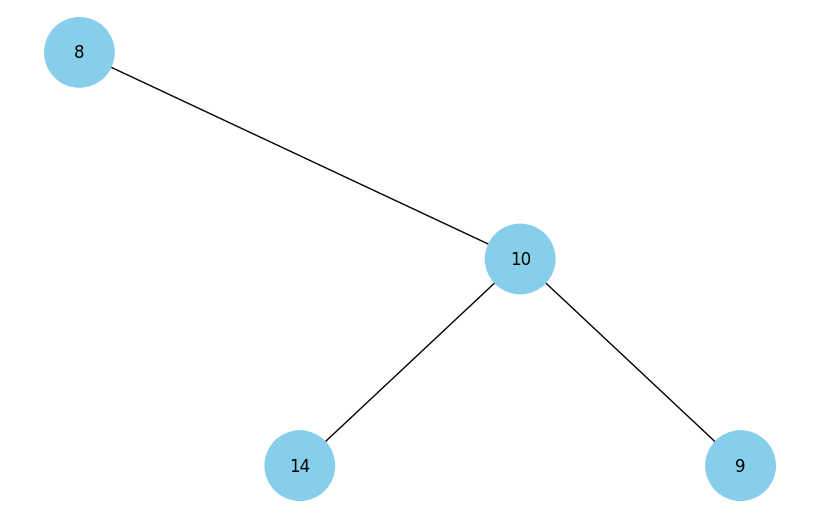

In [1]:
import uuid
import networkx as nx
import matplotlib.pyplot as plt

class HeapNode:
    def __init__(self, key, color="skyblue"):
        self.left = None
        self.right = None
        self.val = key
        self.color = color
        self.id = str(uuid.uuid4())

def add_heap_edges(graph, node, pos, x=0, y=0, layer=1):
    if node is not None:
        graph.add_node(node.id, color=node.color, label=node.val)
        if node.left:
            graph.add_edge(node.id, node.left.id)
            l = x - 1 / 2 ** layer
            pos[node.left.id] = (l, y - 1)
            l = add_heap_edges(graph, node.left, pos, x=l, y=y - 1, layer=layer + 1)
        if node.right:
            graph.add_edge(node.id, node.right.id)
            r = x + 1 / 2 ** layer
            pos[node.right.id] = (r, y - 1)
            r = add_heap_edges(graph, node.right, pos, x=r, y=y - 1, layer=layer + 1)
    return graph

def draw_heap(heap_root):
    heap = nx.DiGraph()
    pos = {heap_root.id: (0, 0)}
    heap = add_heap_edges(heap, heap_root, pos)

    colors = [node[1]['color'] for node in heap.nodes(data=True)]
    labels = {node[0]: node[1]['label'] for node in heap.nodes(data=True)}

    plt.figure(figsize=(8, 5))
    nx.draw(heap, pos=pos, labels=labels, arrows=False, node_size=2500, node_color=colors)
    plt.show()

# Створення бінарної купи
heap_root = HeapNode(8)
heap_root.right = HeapNode(10)
heap_root.right.left = HeapNode(14)
heap_root.right.right = HeapNode(9)

# Відображення бінарної купи
draw_heap(heap_root)


Цей код створює бінарну купу з коренем 8, правим нащадком якого є 10, а у 10 вже є свої правий та лівий нащадки. Відображення купи виконується за допомогою функції draw_heap.
